In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 22})

In [185]:
class NetworkGenerator():
    '''Class defining a network generator'''
    def erdos_renyi(self, nodes = 1000, probability = 0.05, random_state = None):
        '''Creates a network using erdos-renyi method with given number of nodes by randomly connecting pairs

        Args:
            nodes (int): The number of nodes,
            probability (float): The probability of connecting two nodes,
            random_state (int): Random state of the generator

        '''
        random = np.random.RandomState(random_state)
        
        links = [[Node(Node.states['susceptible'], i)] for i in range(nodes)]
        for a in links:
            for b in links:
                if (a != b) and (random.random_sample() < probability) and (a[0] not in b):
                    a.append(b[0])
                    b.append(a[0])
        links = np.array(links)
        return Graph(links)


class Node:
    '''Class defining a node in graph

    Attributes:
        infected (bool): Describes if node is infected or not,
        immune (bool): Describes if node is immune to future infections, 
        index (int): Represents node index
    '''
    states = {'susceptible': 0, 'infected': 1, 'recovered': 2}
    
    def __init__(self, state, index):
        self.state = state
        self.index = index
    
    def __repr__(self):
        return repr(self.index) + ": " + repr({v: k for k, v in self.states.items()}[self.state])

class Graph:
    '''Class defining a graph

    Attributes:
        links (:obj:`list` of :obj:`list` of :obj:`Node`): List of connections between nodes
    '''
    def __init__(self, links):
        self.links = links
                    
    
    def infect(self, model = 'SI', iterations = 20,
               si_p = 0.01, ir_p = 0.01, is_p = 0.01, rs_p = 0.01, random_state = None):
        '''Selects random node as patient zero and performs the infection process among all nodes. New, total and 
        actual cases are stored in appropiate lists.

        Args:
            model (string): The selected model of infection,
            iterations (int): The number of iterations,
            si_p (float): The infection probability,
            ir_p (float): The recover probability,
            new (:obj:`list` of :obj:`int`): The list of new cases,
            total (:obj:`list` of :obj:`int`): The list of total cases,
            actual (:obj:`list` of :obj:`int`): The list of actual cases

        '''
        random = np.random.RandomState(random_state)
        
        if model == 'SI':
            ir_p = 0
            is_p = 0
            rs_p = 0
        elif model == 'SIS':
            ir_p = 0
            rs_p = 0
        elif model == 'SIR':
            is_p = 0
            rs_p = 0
        elif model == 'SIRS':
            is_p = 0
        else:
            raise Exception('Model is not defined')
        
        susceptible, infected, recovered = [], [], []
        patient_zero = random.randint(0, len(self.links))
        self.links[patient_zero][0].state = Node.states['infected']
        #print('Patient zero:', patient_zero.index)
        for i in range(iterations):
            sus, inf, rec = 0, 0, 0
            for node in self.links:
                if node[0].state == Node.states['infected']:
                    if random.random_sample() < ir_p:
                        node[0].state = Node.states['recovered']
                        rec += 1
                        inf -= 1
                    if random.random_sample() < is_p:
                        node[0].state = Node.states['susceptible']
                        sus += 1
                        inf -= 1
                for neighboor in node:
                    if neighboor != node[0] and \
                        node[0].state == Node.states['infected'] and \
                        neighboor.state == Node.states['susceptible'] and \
                        random.random_sample() < si_p:
                        neighboor.state = Node.states['infected']
                        inf += 1
                        sus -= 1
                        
            susceptible.append(sus)
            infected.append(inf)
            recovered.append(rec)

        return susceptible, infected, recovered
    

In [196]:
ng = NetworkGenerator()
er = ng.erdos_renyi(nodes = 1000, probability = 0.01, random_state = 1)

In [197]:
susceptible, infected, recovered = er.infect(model = 'SI', iterations = 100, si_p=0.01, random_state = 1)
infected_sum = np.cumsum(infected)
sus = len(er.links) + np.cumsum(susceptible)

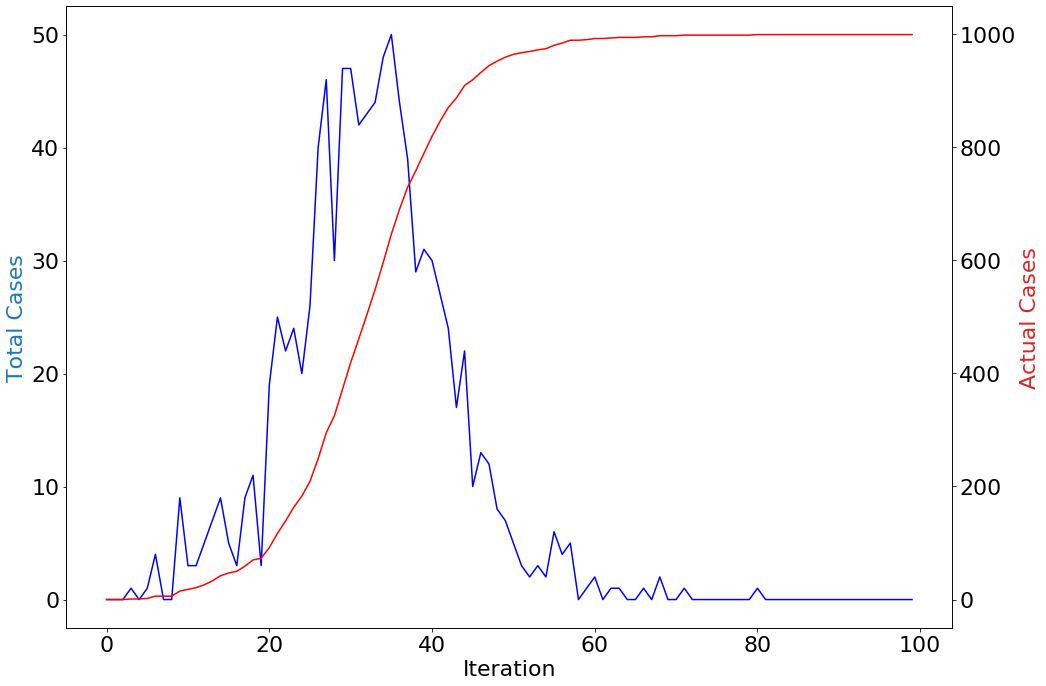

In [199]:
fig, ax1 =  plt.subplots(figsize=(15,10))
x, y = range(0, len(infected)), [case for case in infected]
ax1.plot(x, y, color = 'blue')
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Total Cases", color = 'tab:blue')

ax2 = ax1.twinx()
x, y = range(0, len(infected)), [case for case in infected_sum]
ax2.plot(x, y, color = 'red')
ax2.set_ylabel("Actual Cases", color = 'tab:red')

fig.tight_layout()
plt.show()

In [177]:
r = np.random.RandomState(False)
r.choice(er.links)

[5: 'susceptible']

In [78]:
er.links[7][0].state

1

In [65]:
# er.links[0][0].state
Node.states['infected']

1

In [263]:
list1 = np.array([1,2,3])
list2 = np.array([1,2,3])

In [120]:
er.links

array([list([0: 'infected', 5: 'infected', 7: 'infected', 9: 'infected']),
       list([1: 'infected', 3: 'infected', 5: 'infected']),
       list([2: 'infected', 8: 'infected']),
       list([3: 'infected', 1: 'infected', 7: 'infected']),
       list([4: 'susceptible']),
       list([5: 'infected', 0: 'infected', 1: 'infected']),
       list([6: 'susceptible']),
       list([7: 'infected', 0: 'infected', 3: 'infected', 8: 'infected', 9: 'infected']),
       list([8: 'infected', 2: 'infected', 7: 'infected']),
       list([9: 'infected', 7: 'infected', 0: 'infected'])], dtype=object)

In [195]:
sus

array([1000, 1000, 1000, 1001, 1001, 1002, 1006, 1006, 1006, 1015, 1018,
       1021, 1026, 1033, 1042, 1047, 1050, 1059, 1070, 1073, 1092, 1117,
       1139, 1163, 1183, 1209, 1249, 1295, 1325, 1372, 1419, 1461, 1504,
       1548, 1596, 1646, 1690, 1729, 1758, 1789, 1819, 1846, 1870, 1887,
       1909, 1919, 1932, 1944, 1952, 1959, 1964, 1967, 1969, 1972, 1974,
       1980, 1984, 1989, 1989, 1990, 1992, 1992, 1993, 1994, 1994, 1994,
       1995, 1995, 1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998,
       1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
       1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
       1999], dtype=int32)